In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

In [2]:
df= pd.read_csv("F:\Python\Assignment\Assignment 14-Decision Trees\Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


<AxesSubplot:>

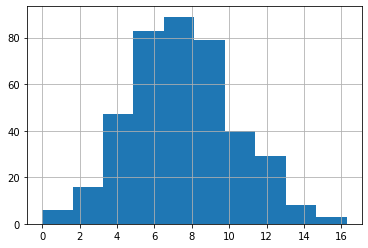

In [4]:
df.Sales.hist()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [7]:
df.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [8]:
df.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

## for converting the continuous varibale into catogorical variable for Sales feature 

In [9]:
y = pd.cut(df.Sales , bins=[-1,10,17], labels=["low" , "high"])

In [10]:
y

0       low
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399     low
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['low' < 'high']

In [11]:
y.value_counts()

low     322
high     78
Name: Sales, dtype: int64

In [12]:
y.isna().sum() # if bins are not created properly then it can create NaN in dataframe, so checking for the same

0

In [13]:
x= df.iloc[: , 1:10]

In [14]:
# creating dummy variable for catagorical features
X= pd.get_dummies(x)
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0
397,162,26,12,368,159,40,18,0,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using Tree with Gini Criteria and max depth of 3

In [16]:
dtc_gi= DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)

In [17]:
dtc_gi.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [18]:
ypred_gi = dtc_gi.predict(x_test)

In [19]:
accuracy_score1 =np.round(accuracy_score(y_test,ypred_gi)*100, 3)
print(f"Accuracy score using gini criterion with max depth 3 is {accuracy_score1} %")

Accuracy score using gini criterion with max depth 3 is 83.333 %


In [20]:
print(f"confusion matrix \n {confusion_matrix(y_test, ypred_gi)}")

confusion matrix 
 [[17  7]
 [13 83]]


In [21]:
print(f"Test score is {dtc_gi.score(x_test, y_test)}")
print(f"Train score is {dtc_gi.score(x_train, y_train)}")

Test score is 0.8333333333333334
Train score is 0.8821428571428571


In [22]:
print(classification_report(y_test, ypred_gi))

              precision    recall  f1-score   support

        high       0.57      0.71      0.63        24
         low       0.92      0.86      0.89        96

    accuracy                           0.83       120
   macro avg       0.74      0.79      0.76       120
weighted avg       0.85      0.83      0.84       120



# Using tree with entropy criterion

In [23]:
dtc_en = DecisionTreeClassifier(criterion="entropy" , max_depth=3, random_state=42)
dtc_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [24]:
ypred_en = dtc_en.predict(x_test)

In [25]:
print(classification_report(y_test, ypred_en))

              precision    recall  f1-score   support

        high       0.75      0.50      0.60        24
         low       0.88      0.96      0.92        96

    accuracy                           0.87       120
   macro avg       0.82      0.73      0.76       120
weighted avg       0.86      0.87      0.86       120



In [26]:
accu=np.round(accuracy_score(y_test, ypred_en)*100,3)
print(f"Accuracy score using entropy criterion with max depth 3 is {accu} %")

Accuracy score using entropy criterion with max depth 3 is 86.667 %


In [27]:
print(f"confusion matrix \n {confusion_matrix(y_test, ypred_en)}")

confusion matrix 
 [[12 12]
 [ 4 92]]


In [28]:
print(f"Test score is {dtc_en.score(x_test, y_test)}")
print(f"Train score is {dtc_en.score(x_train, y_train)}")

Test score is 0.8666666666666667
Train score is 0.8607142857142858


# Using Tree with cost Complexity Pruning Technique

In [29]:
dtc = DecisionTreeClassifier(random_state= 42)
dtc.fit(x_train, y_train)
ypred = dtc.predict(x_test)

In [30]:
accuracy_score(y_test, ypred)

0.7583333333333333

[Text(450.46875, 513.4, 'X[8] <= 0.5\ngini = 0.311\nsamples = 280\nvalue = [54, 226]'),
 Text(238.3125, 453.0, 'X[4] <= 94.5\ngini = 0.198\nsamples = 224\nvalue = [25, 199]'),
 Text(93.0, 392.6, 'X[0] <= 120.5\ngini = 0.467\nsamples = 35\nvalue = [13, 22]'),
 Text(46.5, 332.2, 'X[5] <= 28.5\ngini = 0.346\nsamples = 27\nvalue = [6, 21]'),
 Text(23.25, 271.8, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(69.75, 271.8, 'X[2] <= 1.5\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(46.5, 211.39999999999998, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(93.0, 211.39999999999998, 'X[3] <= 423.0\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(69.75, 151.0, 'X[7] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(46.5, 90.59999999999997, 'X[11] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(23.25, 30.199999999999932, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(69.75, 30.199999999999932, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(93.0, 90.599999

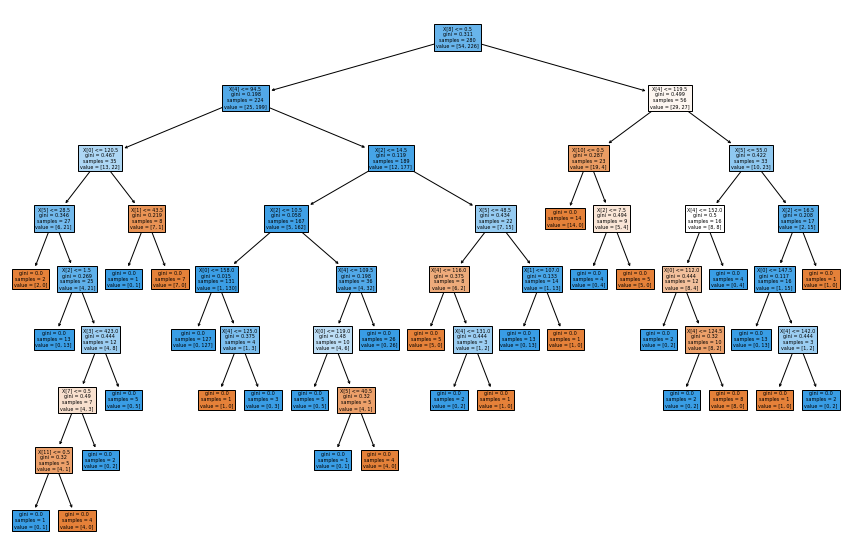

In [31]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc, filled= True)

In [32]:
prun_path = dtc.cost_complexity_pruning_path(x_train, y_train)
prun_path

{'ccp_alphas': array([0.        , 0.00334821, 0.00354417, 0.0047619 , 0.00571429,
        0.00571429, 0.00590861, 0.00595238, 0.00609524, 0.00625   ,
        0.00663265, 0.00728079, 0.00929463, 0.00933333, 0.01180124,
        0.01414009, 0.01878401, 0.02000213, 0.02648641, 0.0528125 ]),
 'impurities': array([0.        , 0.00669643, 0.01378476, 0.01854666, 0.02426095,
        0.02997524, 0.03588385, 0.04183623, 0.06012194, 0.06637194,
        0.0730046 , 0.09484698, 0.13202548, 0.14135882, 0.1649613 ,
        0.19324148, 0.21202549, 0.23202762, 0.25851403, 0.31132653])}

In [33]:
ccp_alphas, impurities = prun_path.ccp_alphas , prun_path.impurities

In [34]:
ccp_alphas

array([0.        , 0.00334821, 0.00354417, 0.0047619 , 0.00571429,
       0.00571429, 0.00590861, 0.00595238, 0.00609524, 0.00625   ,
       0.00663265, 0.00728079, 0.00929463, 0.00933333, 0.01180124,
       0.01414009, 0.01878401, 0.02000213, 0.02648641, 0.0528125 ])

In [35]:
impurities

array([0.        , 0.00669643, 0.01378476, 0.01854666, 0.02426095,
       0.02997524, 0.03588385, 0.04183623, 0.06012194, 0.06637194,
       0.0730046 , 0.09484698, 0.13202548, 0.14135882, 0.1649613 ,
       0.19324148, 0.21202549, 0.23202762, 0.25851403, 0.31132653])

In [36]:
dtcs= []
for ccp in ccp_alphas:
    dtc1 = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp)
    dtc1.fit(x_train, y_train)
    dtcs.append(dtc1)

#print(f"the number of nodes in th last tree is {dtcs[-1].tree_.node_count} with ccp_alphas {ccp_alphas[-1]}")


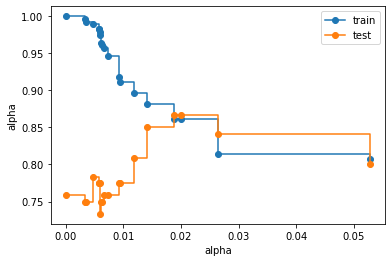

In [37]:
train_score = [dtcc.score(x_train, y_train) for dtcc in dtcs]
test_score = [dtcc.score(x_test, y_test) for dtcc in dtcs]

fig, ax= plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("alpha")
ax.plot(ccp_alphas, train_score, label= "train", drawstyle= "steps-post", marker= "o")
ax.plot(ccp_alphas, test_score, label= "test", drawstyle= "steps-post", marker= "o")
ax.legend()
plt.show()

In [38]:
# from above graph selecting the point of convergence
dtc_op= DecisionTreeClassifier(random_state=42, ccp_alpha= 0.02)
dtc_op.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=42)

In [39]:
y_pred = dtc_op.predict(x_test)

In [40]:
accuracy_score(y_test, y_pred)

0.8666666666666667

In [41]:
dtc_op.score(x_train, y_train)

0.8607142857142858

In [42]:
dtc_op.score(x_test, y_test)

0.8666666666666667

[Text(418.5, 453.0, 'X[8] <= 0.5\ngini = 0.311\nsamples = 280\nvalue = [54, 226]'),
 Text(209.25, 271.8, 'X[4] <= 94.5\ngini = 0.198\nsamples = 224\nvalue = [25, 199]'),
 Text(104.625, 90.59999999999997, 'gini = 0.467\nsamples = 35\nvalue = [13, 22]'),
 Text(313.875, 90.59999999999997, 'gini = 0.119\nsamples = 189\nvalue = [12, 177]'),
 Text(627.75, 271.8, 'X[4] <= 119.5\ngini = 0.499\nsamples = 56\nvalue = [29, 27]'),
 Text(523.125, 90.59999999999997, 'gini = 0.287\nsamples = 23\nvalue = [19, 4]'),
 Text(732.375, 90.59999999999997, 'gini = 0.422\nsamples = 33\nvalue = [10, 23]')]

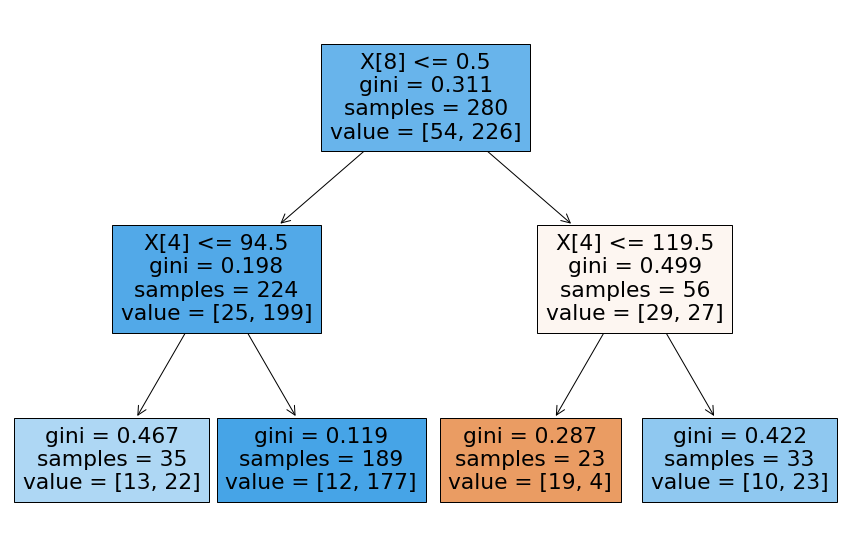

In [43]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc_op, filled= True)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.75      0.50      0.60        24
         low       0.88      0.96      0.92        96

    accuracy                           0.87       120
   macro avg       0.82      0.73      0.76       120
weighted avg       0.86      0.87      0.86       120



In [45]:
confusion_matrix(y_test, y_pred)

array([[12, 12],
       [ 4, 92]], dtype=int64)

# Using Bagging Technique

In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [54]:
bagged_model = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(),
        n_estimators= 100,
        max_samples= 0.8,
        oob_score= True,
        random_state= 42
)

In [55]:
bagged_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=42)

In [59]:
bagged_model.score(x_test, y_test)

0.8916666666666667

In [60]:
ypred_bag = bagged_model.predict(x_test)

In [61]:
accuracy_score(y_test, ypred_bag)

0.8916666666666667

In [62]:
print(classification_report(y_test, ypred_bag))

              precision    recall  f1-score   support

        high       0.72      0.75      0.73        24
         low       0.94      0.93      0.93        96

    accuracy                           0.89       120
   macro avg       0.83      0.84      0.83       120
weighted avg       0.89      0.89      0.89       120



In [63]:
confusion_matrix(y_test, ypred_bag)

array([[18,  6],
       [ 7, 89]], dtype=int64)

In [65]:
scores = cross_val_score(bagged_model, X, y, cv= 10)

In [66]:
scores

array([0.875, 0.85 , 0.85 , 0.775, 0.85 , 0.925, 0.85 , 0.85 , 0.85 ,
       0.925])

In [67]:
np.mean(scores)

0.86

# Conclusions
### 1. It can be seen that Gini with max depth 3 gives less accuracy
### 2. The entropy criteria with max depth 3 , shows good accuracy
### 3. The same accuracy is obtained by using pruning techniqe
### 4. Bagging Provided better results as compared to others